<a href="https://colab.research.google.com/github/sillHD/TAM_clase/blob/main/TAM_clase_11_09_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_regression
N = 1000 # samples
P = 20 # features

X, y = make_regression(n_samples=N, n_features=P, noise=1, random_state = 42)

print(X.shape, y.shape)



(1000, 20) (1000,)


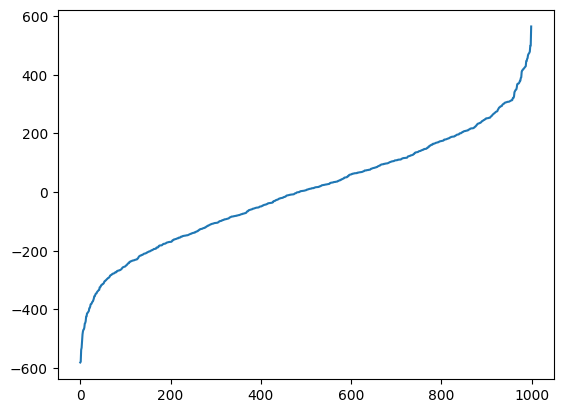

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show()

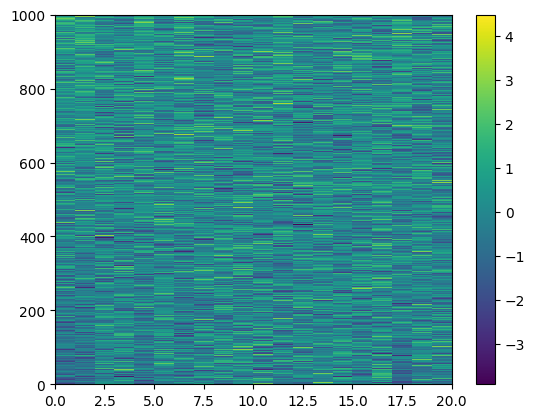

In [ ]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_, :])
plt.colorbar()
plt.show()

In [ ]:
def mincua_reg(X, y, lamb = 1e-3): # ajustar / optimizar
  alpha = np.linalg.inv(X.T.dot(X)+lamb*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


<StemContainer object of 3 artists>

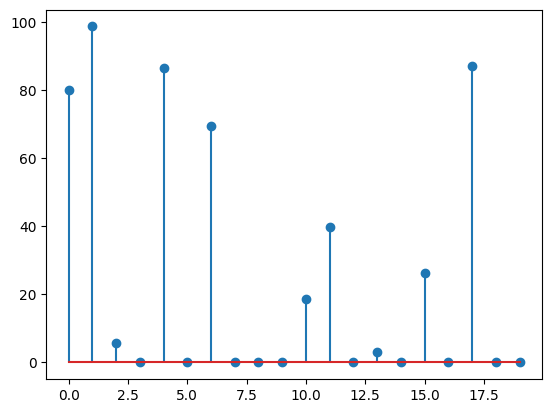

In [ ]:
alpha = mincua_reg(X, y)
print(alpha)
plt.stem(np.arange(len(alpha)), np.abs(alpha))

In [ ]:
ypred = X.dot(alpha)

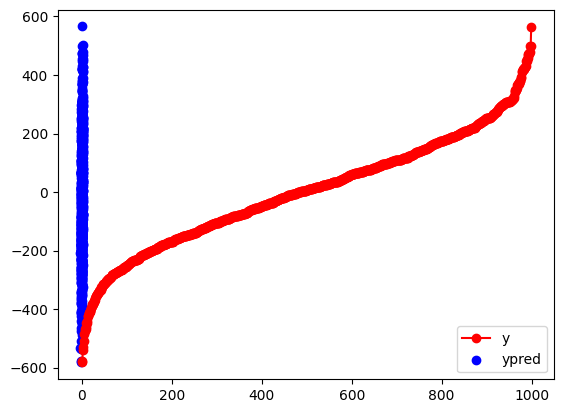

In [ ]:
plt.plot(y[ind_], color="r", marker = "o", label = "y")
plt.scatter(X[ind_, 0],ypred[ind_], color = "b", label = "ypred")
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


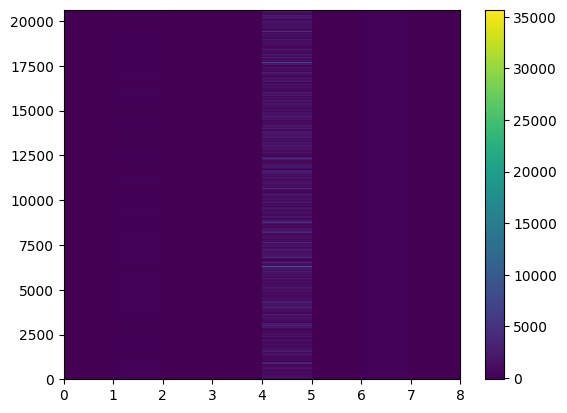

In [ ]:
X = housing.data
y = housing.target
print(X.shape, y.shape)
plt.pcolormesh(X)
plt.colorbar()
plt.show()

# Trabajo para el lunes

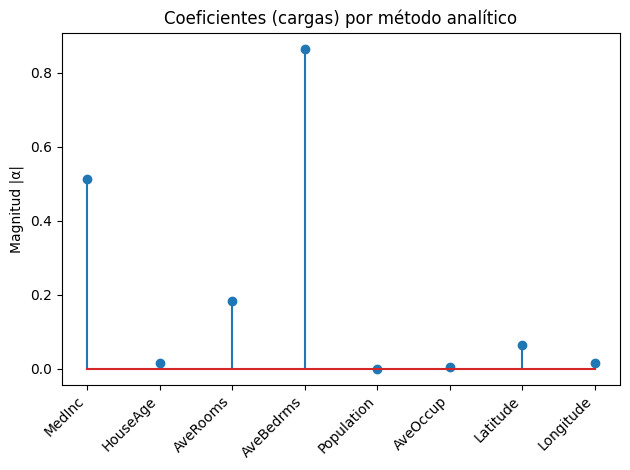

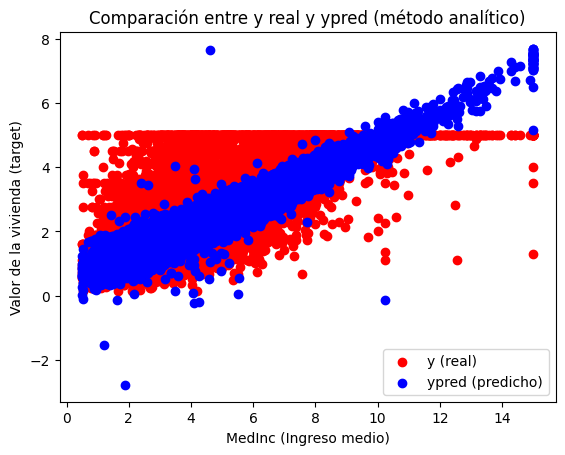

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 1. Cargar dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
names = housing.feature_names

# 2. Funci√≥n anal√≠tica (regresi√≥n regularizada)
def mincua_reg(X, y, lamb=1e-3):
    XTX = X.T @ X
    reg = lamb * np.eye(X.shape[1])
    alpha = np.linalg.inv(XTX + reg) @ X.T @ y
    return alpha

# 3. Calcular coeficientes
alpha = mincua_reg(X, y)

# 4. Predecir con el modelo
ypred = X @ alpha

# 5. Graficar coeficientes (cargas)
plt.stem(np.arange(len(alpha)), np.abs(alpha))
plt.xticks(np.arange(len(alpha)), names, rotation=45, ha="right")
plt.title("Coeficientes (cargas) por m√©todo anal√≠tico")
plt.ylabel("Magnitud |Œ±|")
plt.tight_layout()
plt.show()

# 6. Graficar comparaci√≥n real vs predicho (usando feature MedInc)
ind_ = np.argsort(y)  # ordenar por valor de y para una mejor visualizaci√≥n
plt.scatter(X[ind_,0], y[ind_], c='r', marker='o', label='y (real)')
plt.scatter(X[ind_,0], ypred[ind_], c='b', label='ypred (predicho)')
plt.xlabel("MedInc (Ingreso medio)")
plt.ylabel("Valor de la vivienda (target)")
plt.legend()
plt.title("Comparaci√≥n entre y real y ypred (m√©todo anal√≠tico)")
plt.show()


# üîé Feedback al c√≥digo

### ‚úÖ Puntos positivos
- **Claridad en los pasos**: El flujo del c√≥digo est√° bien estructurado (carga de datos, funci√≥n, c√°lculo, visualizaci√≥n).  
- **Funci√≥n gen√©rica `mincua_reg`**: Permite aplicar regularizaci√≥n tipo Ridge ajustando el par√°metro `lamb`.  
- **Visualizaci√≥n doble**: Gr√°ficas de coeficientes y comparaci√≥n entre valores reales vs. predichos.  
- **Uso correcto de `numpy`**: Operaciones matriciales eficientes sin bucles innecesarios.  

---

### ‚ö° Sugerencias de mejora
1. **Normalizaci√≥n/Escalado de datos**  
   Las variables tienen escalas muy diferentes. Usar `StandardScaler` mejora la estabilidad num√©rica y la interpretaci√≥n.  
   ```python
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   X = scaler.fit_transform(X)


## Regresi√≥n lineal anal√≠tica en California Housing

En este ejemplo usamos la **ecuaci√≥n normal** para resolver el problema de regresi√≥n lineal sobre el dataset de California Housing.  

1. **Carga del dataset**  
   - `X` contiene las 8 variables explicativas (ejemplo: ingreso medio, edad promedio de la casa, n√∫mero de habitaciones, etc.).  
   - `y` es el valor medio de la vivienda en cientos de miles de d√≥lares.  

2. **M√©todo anal√≠tico**  
   Usamos la f√≥rmula cerrada de m√≠nimos cuadrados regularizados:
   $$
   \alpha = (X^T X + \lambda I)^{-1} X^T y
   $$
   donde:
   - \(\alpha\) son los coeficientes del modelo.
   - \(\lambda\) es un t√©rmino de regularizaci√≥n peque√±o para evitar problemas de inversi√≥n.

3. **Interpretaci√≥n de la gr√°fica**  
   - Cada barra corresponde a un coeficiente \(\alpha\) asociado a una variable del dataset.  
   - La **altura** de la barra indica la **magnitud** de la influencia de esa variable sobre el precio medio de la vivienda.  
   - Si un coeficiente es **positivo**, significa que esa variable est√° **positivamente correlacionada** con el precio (a mayor valor de la variable, mayor precio esperado).  
   - Si es **negativo**, indica una relaci√≥n **inversa** (a mayor valor de la variable, menor precio esperado).  
   - Comparando las magnitudes podemos identificar qu√© variables tienen mayor peso en la predicci√≥n.  

En conclusi√≥n, la gr√°fica de los coeficientes nos ayuda a **interpretar qu√© factores influyen m√°s** en el valor de las viviendas dentro del modelo lineal.


#Gradiente descendiente

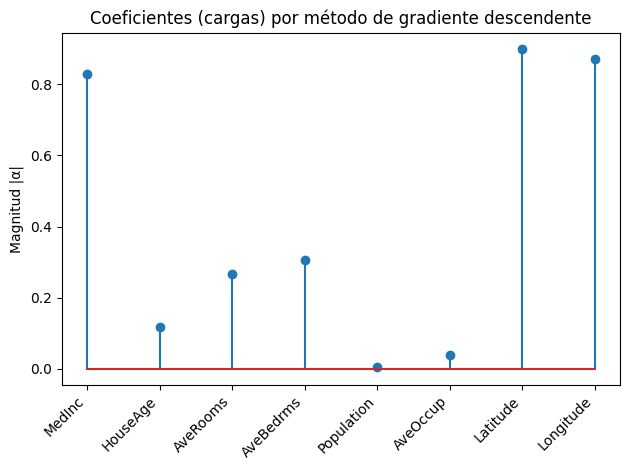

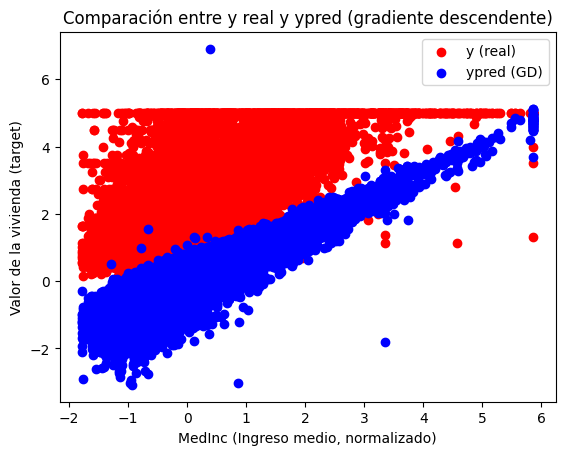

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 1. Cargar dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
names = housing.feature_names

# Normalizaci√≥n b√°sica para mejorar convergencia
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 2. Implementaci√≥n de gradiente descendente
def gradiente_desc(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    alpha = np.zeros(n)  # inicializar par√°metros en cero

    for _ in range(epochs):
        grad = (1/m) * X.T @ (X @ alpha - y)
        alpha -= lr * grad
    return alpha

# 3. Calcular coeficientes
alpha_gd = gradiente_desc(X, y, lr=0.1, epochs=5000)

# 4. Predicci√≥n
ypred_gd = X @ alpha_gd

# 5. Graficar coeficientes
plt.stem(np.arange(len(alpha_gd)), np.abs(alpha_gd))
plt.xticks(np.arange(len(alpha_gd)), names, rotation=45, ha="right")
plt.title("Coeficientes (cargas) por m√©todo de gradiente descendente")
plt.ylabel("Magnitud |Œ±|")
plt.tight_layout()
plt.show()

# 6. Comparaci√≥n real vs predicho usando MedInc
ind_ = np.argsort(y)
plt.scatter(X[ind_,0], y[ind_], c='r', marker='o', label='y (real)')
plt.scatter(X[ind_,0], ypred_gd[ind_], c='b', label='ypred (GD)')
plt.xlabel("MedInc (Ingreso medio, normalizado)")
plt.ylabel("Valor de la vivienda (target)")
plt.legend()
plt.title("Comparaci√≥n entre y real y ypred (gradiente descendente)")
plt.show()


# üîé Feedback al c√≥digo (Gradiente Descendente)

### ‚úÖ Puntos positivos
- **Normalizaci√≥n previa**: Muy buena pr√°ctica para mejorar la convergencia del algoritmo.  
- **Implementaci√≥n clara**: La funci√≥n `gradiente_desc` est√° bien estructurada, con inicializaci√≥n de par√°metros, c√°lculo de gradiente y actualizaci√≥n.  
- **Par√°metros configurables**: Permites ajustar `lr` (learning rate) y `epochs`, lo que facilita experimentar.  
- **Visualizaciones √∫tiles**: Incluyes tanto la magnitud de coeficientes como la comparaci√≥n entre valores reales y predichos.  

---

### ‚ö° Sugerencias de mejora
1. **Intercepto (bias)**  
   Actualmente no se incluye un t√©rmino independiente. Se puede a√±adir una columna de unos a `X`:  
   ```python
   X = np.c_[np.ones(X.shape[0]), X]


## Ventajas del gradiente descendente sobre la soluci√≥n anal√≠tica

Cuando resolvemos problemas de regresi√≥n lineal, existen dos enfoques principales:  
- **Soluci√≥n anal√≠tica (ecuaci√≥n normal)**: usa la f√≥rmula cerrada  
  $$
  \alpha = (X^TX)^{-1}X^Ty
  $$
- **Gradiente descendente (GD)**: ajusta los par√°metros de manera iterativa siguiendo el gradiente de la funci√≥n de costo.  

### üîπ Ventajas del gradiente descendente
1. **Escalabilidad en grandes datasets**  
   - La inversi√≥n de matriz \((X^TX)^{-1}\) cuesta aproximadamente **O(n¬≥)**, lo que es ineficiente con miles o millones de features.  
   - GD escala mejor, con complejidad **O(n¬∑m)** por iteraci√≥n.  

2. **Uso eficiente de memoria y datos**  
   - GD puede entrenarse en **mini-lotes (mini-batches)** o incluso ejemplo por ejemplo (**SGD**), lo que permite trabajar con datasets enormes que no caben en memoria.  

3. **Aplicable a modelos no lineales**  
   - La soluci√≥n anal√≠tica solo existe para problemas lineales.  
   - En modelos m√°s complejos (ej. redes neuronales), el GD es pr√°cticamente la √∫nica opci√≥n.  

4. **Flexibilidad**  
   - GD se adapta f√°cilmente a diferentes formas de regularizaci√≥n o funciones de costo, basta con modificar el gradiente.  

5. **Trade-off tiempo vs precisi√≥n**  
   - GD permite detenerse antes de la convergencia si necesitamos una soluci√≥n ‚Äúsuficientemente buena‚Äù.  
   - La soluci√≥n anal√≠tica siempre busca el valor exacto, que puede ser costoso de calcular en datasets grandes.  

### üîπ Comparaci√≥n r√°pida

| M√©todo | Pros | Contras |
|--------|------|---------|
| **Anal√≠tico (ecuaci√≥n normal)** | Soluci√≥n exacta, r√°pido en datasets peque√±os | No escala con muchas features, requiere invertir matrices grandes |
| **Gradiente descendente** | Escalable, usable en big data y redes neuronales, adaptable | Aproximado, depende de hiperpar√°metros (learning rate, epochs) |

**Conclusi√≥n:**  
- Si el dataset es **peque√±o**, conviene usar la **soluci√≥n anal√≠tica**.  
- Si el dataset es **grande** o el modelo es **no lineal**, el **gradiente descendente** es la mejor (o √∫nica) alternativa.
